images len = 1,431
annotations len = 1,431


2it [00:00, 16.54it/s]

segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0001.PNG
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0002.PNG
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0003.PNG
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0004.jpg
category_id = 0


5it [00:00, 19.94it/s]

segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0005.PNG
category_id = 0


7it [00:00, 18.18it/s]

segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0006.PNG
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0007.PNG
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0008.jpg
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0009.jpg
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0010.jpg
category_id = 0


11it [00:00, 18.74it/s]

segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0011.PNG
category_id = 0
segmentation = []
img_file_path = ./ModelData/스마트축사/test_images_label/test_0012.PNG
category_id = 0


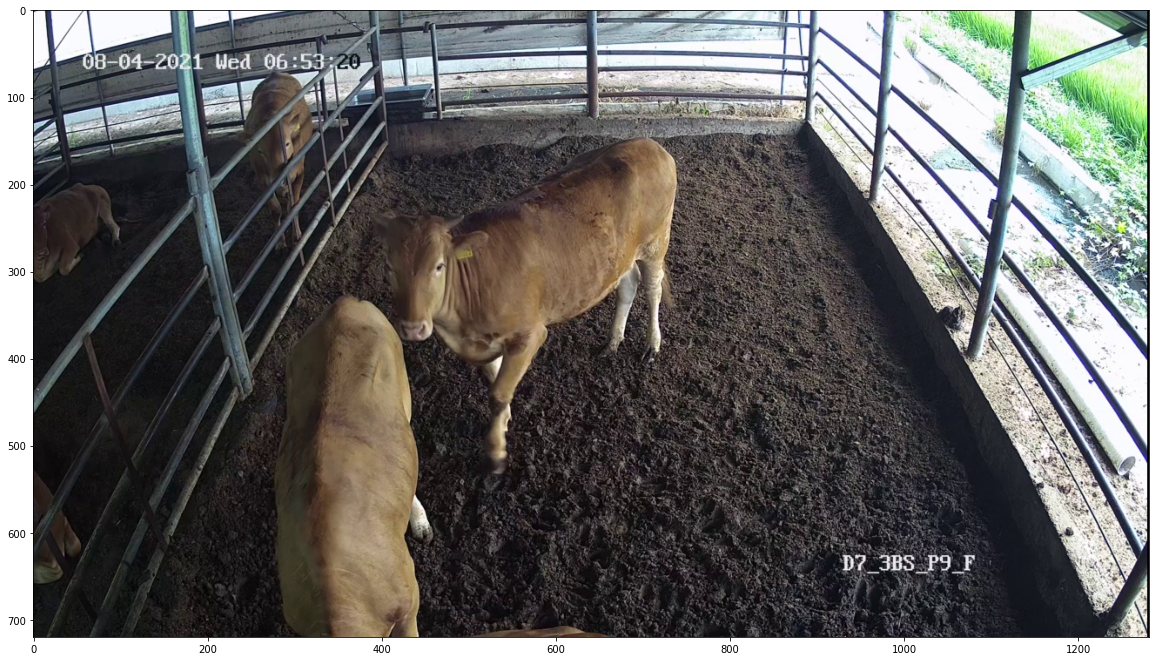

Done.


In [3]:
import os, pathlib, json, cv2, cv2 as cv
import numpy as np
from tqdm import tqdm, trange
from os import walk
import matplotlib.pyplot as plt 
from PIL import Image
from b201_create_label_image import *

modes = [ "test" ] 
debug = 1

img_file_path = None

colors = [ (0, 0, 255), (0, 0, 255), (0, 255, 0) ]
for mode in modes : 
    json_file = f"./ModelData/스마트축사/{mode}_answer.json"
    image_folder =  f"./ModelData/스마트축사/{mode}_images/"
    image_label_folder =  f"./ModelData/스마트축사/{mode}_images_label/"
    
    if not os.path.exists( image_label_folder ):
        os.makedirs(image_label_folder)
        print( f"Folder crated. [{image_label_folder}]" )
    pass

    json_data = json.load( open( json_file, 'r') )

    images = json_data['images']
    annotations = json_data['annotations']
    
    print( f"images len = {len(images):,}" )
    id_img_files = {}
    
    for idx, image in enumerate( images ) :
        file_name = image[ "file_name" ]
        id = image[ "id" ]
        
        id_img_files[ id ] = file_name
    pass

    debug and print( f"annotations len = {len(annotations):,}" ) 
    
    for idx, anno in tqdm( enumerate( annotations ) ):
        image_id = anno[ "image_id" ]
        category_id = int( anno[ "category_id" ] )
        segmentation = anno[ "segmentation" ]
        img_file = id_img_files[ image_id ]
        
        img_file_path = image_folder + img_file
        image = cv2.imread( img_file_path ) 
        
        pts = [ [] ]
        for i in range( 0, len( segmentation ), 2 ) :
            pts[0].append( [ segmentation[i], segmentation[i+1] ] )
        pass
    
        pts = np.array( pts, np.int32 ) 
    
        cv2.polylines( image, pts, True, colors[ category_id ], 2)
        
        img_file_path = image_label_folder + img_file
        cv2.imwrite( img_file_path, image ) 
        
        if debug :
            #print( f"image_id = {image_id}" )
            print( f"segmentation = {segmentation}" )
            print( f"img_file_path = {img_file_path}" ) 
            print( f"category_id = {category_id}" ) 
            
            if idx > 10 : break
        pass
    pass
            
pass

w = 20 ; h = w
plt.rcParams["figure.figsize"] = (w, h)
plt.imshow( Image.open( img_file_path ) ) 
plt.show()

print( "Done." )
